# Exercise 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 2.1

Here we want to calculate the value of a 1 dimensional integral using first random number sampled from a uniform distribution, then from a distribution which is closer to the function we are integrating

First we load the data from the evaluation using uniform distribution sampling

In [2]:
x, I_est_uniform, I_err_uniform = np.loadtxt("I_mc_uniform.dat", unpack = True) 

then from a non uniform distribution

In [23]:
x, I_est_nonuniform, I_err_nonuniform = np.loadtxt("I_mc_nonuniform.dat", unpack = True) 

Text(0.5, 0, 'N')

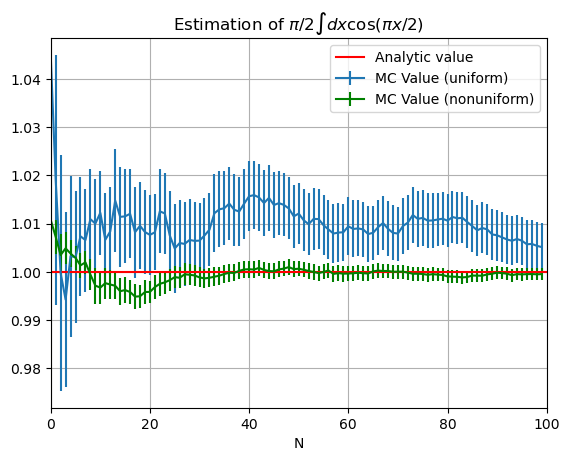

In [26]:
plt.errorbar(x, I_est_uniform, I_err_uniform, label = "MC Value (uniform)")
plt.errorbar(x, I_est_nonuniform, I_err_nonuniform, label = "MC Value (nonuniform)", color = "green", linewidth = 0.5)
plt.axhline(1., color = "red", label = "Analytic value")
plt.legend()
plt.xlim((0, 100))
plt.grid()
plt.title(r"Estimation of $\pi / 2 \int dx \cos(\pi x / 2)$")
plt.xlabel("N")

0.373651755036515